<a href="https://colab.research.google.com/github/ealmenzar/colab_notebooks/blob/main/cats%26dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dogs taxonomy: https://www.expertoanimal.com/taxonomia-del-perro-23771.html

Cats taxonomy: http://fifeweb.org/wp/breeds/breeds_prf_stn.php

In [1]:
!pip install -q tensorflow-datasets tensorflow

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras

In [84]:
# Construct a tf.data.Dataset
ds, ds_info = tfds.load('oxford_iiit_pet', split='train', shuffle_files=True, with_info=True, as_supervised=True)

# Explorando y visualizando la base de datos

In [3]:
for image, label in ds.take(1):  # example is (image, label)
  print(image.shape, label)

(500, 500, 3) tf.Tensor(33, shape=(), dtype=int64)


In [8]:
for image, label in tfds.as_numpy(ds.take(3)):
  print(type(image), type(label), label)
  print(image.shape)
  print(label.shape)

<class 'numpy.ndarray'> <class 'numpy.int64'> 21
(333, 500, 3)
()
<class 'numpy.ndarray'> <class 'numpy.int64'> 13
(342, 500, 3)
()
<class 'numpy.ndarray'> <class 'numpy.int64'> 31
(334, 500, 3)
()


In [85]:
df = tfds.as_dataframe(ds.take(10), ds_info)  # NOTA: ds contiene sólo imágenes de entrenamiento

,image,label
0,,6 (Birman)
1,,33 (Sphynx)
2,,13 (english_setter)
3,,12 (english_cocker_spaniel)
4,,1 (american_bulldog)
5,,30 (scottish_terrier)
6,,12 (english_cocker_spaniel)
7,,9 (British_Shorthair)
8,,34 (staffordshire_bull_terrier)
9,,9 (British_Shorthair)

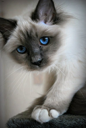
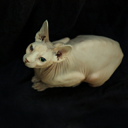
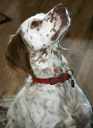
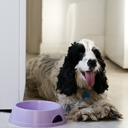
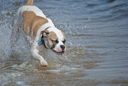
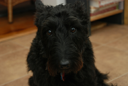
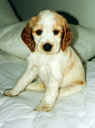
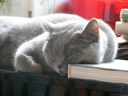
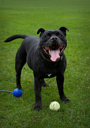
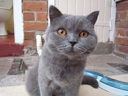

In [111]:
df

In [133]:
j = 0
for i in ds_info.features['label'].names:
  print(j, " --> ", i)
  j += 1
# el índice en esta lista se corresponde con el respectivo label para cada especie

0  -->  Abyssinian
1  -->  american_bulldog
2  -->  american_pit_bull_terrier
3  -->  basset_hound
4  -->  beagle
5  -->  Bengal
6  -->  Birman
7  -->  Bombay
8  -->  boxer
9  -->  British_Shorthair
10  -->  chihuahua
11  -->  Egyptian_Mau
12  -->  english_cocker_spaniel
13  -->  english_setter
14  -->  german_shorthaired
15  -->  great_pyrenees
16  -->  havanese
17  -->  japanese_chin
18  -->  keeshond
19  -->  leonberger
20  -->  Maine_Coon
21  -->  miniature_pinscher
22  -->  newfoundland
23  -->  Persian
24  -->  pomeranian
25  -->  pug
26  -->  Ragdoll
27  -->  Russian_Blue
28  -->  saint_bernard
29  -->  samoyed
30  -->  scottish_terrier
31  -->  shiba_inu
32  -->  Siamese
33  -->  Sphynx
34  -->  staffordshire_bull_terrier
35  -->  wheaten_terrier
36  -->  yorkshire_terrier


In [125]:
df.shape
df_cocker = df.loc[df["label"] == 12] # english_cocker_spaniel

In [ ]:
df_cocker

,image,label
0,"[[[5, 9, 8], [3, 4, 0], [11, 24, 4], [36, 51, ...",12


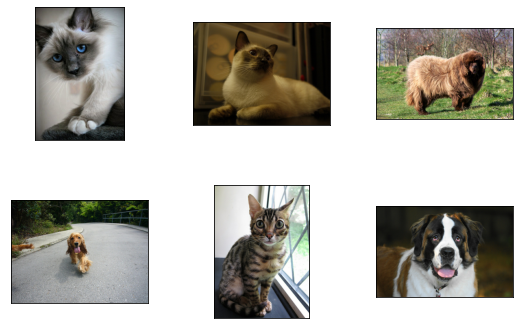

In [ ]:
fig = tfds.show_examples(ds.take(6), ds_info, image_key='image')

In [9]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_labels.shape

(60000,)

In [10]:
test_images.shape

(10000, 28, 28)

# Pre-procesando la base de datos

Parece que al agrupar las imágenes en batches se les asignan unas dimensiones comunes (para el primer batch 500x500, para el segundo batch 900x720, etc.) probablemente en base a la dimensión de la primera imagen de ese batch.
No las agruparemos por batches desde el inicio, o lo que es lo mismo, cada batch contendrá una única imagen de forma que se conserve la dimensión de cada una de las imágenes. Tras hacer un resize de cada imagen, las agruparemos en la forma matricial que nos conviene.

In [56]:
builder = tfds.builder('oxford_iiit_pet')
info = builder.info
info

# same as ds_info

tfds.core.DatasetInfo(
    name='oxford_iiit_pet',
    version=3.2.0,
    description='The Oxford-IIIT pet dataset is a 37 category pet image dataset with roughly 200
images for each class. The images have large variations in scale, pose and
lighting. All images have an associated ground truth annotation of breed.',
    homepage='http://www.robots.ox.ac.uk/~vgg/data/pets/',
    features=FeaturesDict({
        'file_name': Text(shape=(), dtype=tf.string),
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=37),
        'segmentation_mask': Image(shape=(None, None, 1), dtype=tf.uint8),
        'species': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    total_num_examples=7349,
    splits={
        'test': 3669,
        'train': 3680,
    },
    supervised_keys=('image', 'label'),
    citation="""@InProceedings{parkhi12a,
      author       = "Parkhi, O. M. and Vedaldi, A. and Zisserman, A. and Ja

In [76]:
ds_train, info_train = tfds.load(
    'oxford_iiit_pet',
    split='train',
    with_info=True,
    #batch_size=32,
    as_supervised=True,
)

ds_test, info_test = tfds.load(
    'oxford_iiit_pet',
    split='test',
    with_info=True,
    #batch_size=32,
    as_supervised=True,
)

In [77]:
for images, labels in ds_train.take(10):
  print(images.shape, " - ", tfds.as_numpy(labels))

(500, 500, 3)  -  33
(313, 500, 3)  -  12
(500, 333, 3)  -  9
(375, 500, 3)  -  32
(500, 333, 3)  -  33
(219, 300, 3)  -  2
(400, 500, 3)  -  22
(500, 333, 3)  -  22
(191, 300, 3)  -  36
(225, 300, 3)  -  5


Como podemos observar en el siguiente plot, las imágenes tienen distintas dimensiones.

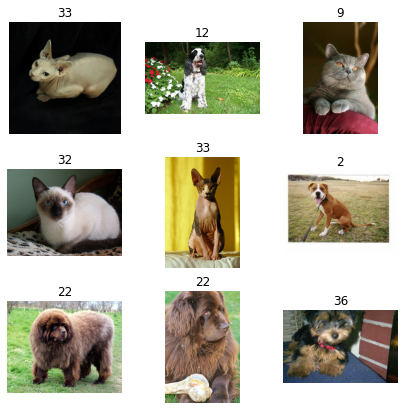

In [78]:
plt.figure(figsize=(7, 7))
i = 0
for images, labels in ds_train.take(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images.numpy().astype("uint8"))  # plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(tfds.as_numpy(labels))            # plt.title(tfds.as_numpy(labels[i]))
    plt.axis("off")
    i+=1

In [79]:
ds_train = ds_train.map(
    lambda image, label: (tf.image.resize(image, (200,200)), label)
)

A continuación podemos observar que ahora ya todoas las imágenes tienen las mismas dimensiones.

**Considerar transformaciones de las imágenes que no generen deformación (o que generen una deformación mínima), como recorte o escalado proporcional. Podríamos tener en cuenta que al deformar la imagen podríamos estar influyendo en la posterior clasificación, puesto que la fisiología de los animales se ve alterada en la imagen).**

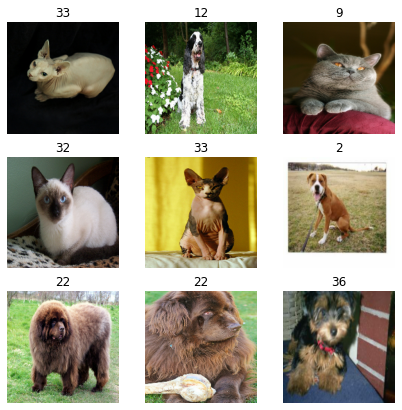

In [80]:
plt.figure(figsize=(7, 7))
i = 0
for images, labels in ds_train.take(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images.numpy().astype("uint8"))  # plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(tfds.as_numpy(labels))            # plt.title(tfds.as_numpy(labels[i]))
    plt.axis("off")
    i+=1

In [82]:
for image, label in tfds.as_numpy(ds_train.take(3)):
   print(type(image), image.shape, type(label), label)

<class 'numpy.ndarray'> (200, 200, 3) <class 'numpy.int64'> 33
<class 'numpy.ndarray'> (200, 200, 3) <class 'numpy.int64'> 12
<class 'numpy.ndarray'> (200, 200, 3) <class 'numpy.int64'> 9


In [83]:
print(ds_train.cardinality().numpy()) # número total de batches en el conjunto de entrenamiento (tantos como imágenes, por lo mencionado anteriormente)

3680


In [73]:
import numpy as np

list_img = []
list_lab = []

for image, label in tfds.as_numpy(ds_train.take(3680)):
  list_img.append(image) 
  list_lab.append(label) 

img_concat = np.stack(list_img, axis=0)
lab_concat = np.stack(list_lab, axis=0)

In [74]:
# La estructura que buscamos en el conjunto de imágenes de entrenamiento: (3680, 200, 200, 3)
#   3680 imágenes en total
#   cada imagen con dimensiones 200x200x3

print(img_concat.shape)
print(lab_concat.shape)

(3680, 200, 200, 3)
(3680,)


**Si hacemos resize de las imágenes a 500x500 la RAM peta al intentar agrupar todo en el mismo lote. Con un resize de 200x200 la RAM no peta. Intentar ajustar esta resolución.**
